<div>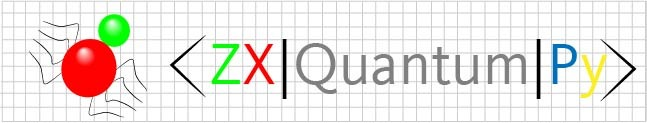</div>

In the previous notebook, we discussed about software package PyZX, creating quantum circuits/ZX-Diagram using PyZX, rewriting quantum circuit as ZX-Diagram, representing the circuit in QASM language and generating ZX-circuit from QASM.

In this Notebook, we will learn about 
1. generating random quantum circuits/graphs using PyZX
2. simplification strategies in PyZX
3. extracting circuits from graphs


First we import all the necessary libraries, please run the cell below to do so by pressing 'shift' + 'enter' or by pressing the run button above.

In [1]:
import pyzx as zx                     # importing PyZX
from fractions import Fraction        # for phases as fractions
import random                         # for random seed

## 1. Generating random quantum circuits/graphs using PyZX
The simplification strategies we are going to learn in this notebook require different types of circuits or graphs, and it is not feasible to generate different circuits each time for all the simplification strategies. Therefore, before we go into the simplification strategies, let us first learn about generating random quantum circuits/graphs using PyZX. 

In PyZX we have following methods to generate random quantum circuits/graphs:
- ```identity```
- ```cnots```
- ```cliffords```
- ```cliffordT```
- ```CNOT_HAD_PHASE_circuit```

### ```identity```
This generates a PyZX graph representing an identity circuit, with given number of qubits as an argument to the ```generate.identity``` method.

In [2]:
ex1 = zx.generate.identity(2)        # generate a graph representing identity circuit with 2 qubits
zx.draw(ex1)                         # draw the graph

### ```cnots``` 
This method generates a circuit/graph consisting of randomly placed CNOT gates by using ```generate.cnots``` method with number of qubits and number of gates as arguments.

In [3]:
random.seed(9)                       # to make sure the same circuit is generated everytime
ex2 = zx.generate.cnots(5,6)         # generate a graph consisting of randomly placed CNOT gates with 5 qubits and 6 CNOT gates
zx.draw(ex2)                         # draw the graph

### ```CNOT_HAD_PHASE_circuit```
This constructs a circuit consisting of CNOT, HAD and phase gates. The default phase gate is the T gate, but if
clifford=True, then this is replaced by the S gate. In addition to number of qubits and gates, it is also possible to pass probabilities of each gate to be a Hadamard gate or a T gate, which are optional, as arguments in the method as
```generate.CNOT_HAD_PHASE_circuit(qubits, depth, p_had=0.2, p_t=0.2, clifford=False)```

Here, optional parameters are
- ```p_had``` – probability that each gate is a Hadamard gate
- ```p_t``` – probability that each gate is a T gate (or if clifford is set, S gate)
- ```clifford``` – when set to True, the phase gates are S gates instead of T gates

In [4]:
random.seed(9)                      # to make sure the same circuit is generated everytime
ex3 = zx.generate.CNOT_HAD_PHASE_circuit(5,6) # generate a graph consisting of randomly placed CNOT, Hadamard and phase gates with 5 qubits and 6 gates
zx.draw(ex3)                        # draw the graph

### ```cliffords```
This is used to generate a circuit/graph consisting of randomly placed Clifford gates as ```generate.cliffords(qubits, depth, no_hadamard=False, t_gates=False)```. Here the optional parameters ```no_hadamard``` and ```t_gates``` denote whether hadamard edges and T gates are allowed to be placed or not.

In [5]:
random.seed(10)                      # to make sure the same circuit is generated everytime
ex4 = zx.generate.cliffords(5,6)     # generate a graph consisting of randomly placed clifford gates with 5 qubits and depth 6
zx.draw(ex4)                         # draw the graph

### ```cliffordT```
```generate.cliffordT(qubits, depth, p_t=None, p_s=None, p_hsh=None, p_cnot=None)``` generates a circuit/graph consisting of randomly placed Clifford + T gates. In addition to number of qubits and gates, the optional parameters in this case are
- ```p_t``` – probability that each gate is a T-gate.
- ```p_s``` – probability that each gate is a S-gate.
- ```p_hsh``` – probability that each gate is a HSH-gate.
- ```p_cnot``` – probability that each gate is a CNOT-gat

In [6]:
random.seed(11)                      # to make sure the same circuit is generated everytime
ex5 = zx.generate.cliffordT(5,16)    # generate a graph consisting of randomly placed clifford and T gates with 5 qubits and depth 16
zx.draw(ex5)                         # draw the graph

## 2. Simplification strategies in PyZX
The ZX-diagram simplification strategies of PyZX are based on applying some combination of the rewrite rules. The main procedures of interest are:


- spider simplification: ```spider_simp```
- identity simplification: ```id_simp```
- clifford simplification: ```clifford_simp```
- full simplification/reduction: ```full_reduce``` 
- teleport simplification/reduction: ```teleport_reduce``` 

### Spider simplification:
This simplification stratergy is based on the spider-fusion rule, which implies that whenever two spiders of same type touch, then they can fuse together, and their phases add to form a single spider. This is done by the method ```simplify.spider_simp```. To demonstrate this spider simplification we first generate a graph with 2 Z-spiders each with $\frac{\pi}{2}$ phase.

In [7]:
# Example for spider_simp

ex6 = zx.Graph()                          # creating an empty graph
v01 = ex6.add_vertex(0,0,0)               # this is a boundary vertex
v02 = ex6.add_vertex(1,0,1,Fraction(1,2)) # this is a Z vertex with phase pi/2
v03 = ex6.add_vertex(0,0,2)               # again a boundary vertex

v11 = ex6.add_vertex(0,1,0)               # this is a boundary vertex
v12 = ex6.add_vertex(1,1,1,Fraction(1,2)) # this is a Z vertex with phase pi/2
v13 = ex6.add_vertex(0,1,2)               # again a boundary vertex

ex6.add_edges([(v01,v02),(v02,v03),(v02,v12),(v11,v12),(v12,v13)]) # this is to add multiple edges to the graph

zx.draw(ex6)                              # to display the graph


# spider simplification
zx.simplify.spider_simp(ex6)               # this does the simplification
zx.draw(ex6)

spider_simp: 1.  1 iterations


### Identity simplification:
This simplification stratergy is used for identity reductions. This is based on the identity rule, which implies that a phaseless Z- or X-spider with two wires is equal to the identity. To demonstrate this identity simplification we first generate a graph with one X-spider and one Z-spider, and then implement the identity simplification by ```simplify.id_simp``` method.

In [8]:
# Example for id_simp

ex7 = zx.Graph()                           # creating an empty graph
v01 = ex7.add_vertex(0,0,0)                # this is a boundary vertex
v02 = ex7.add_vertex(1,0,1)                # this is a Z vertex
v03 = ex7.add_vertex(0,0,2)                # again a boundary vertex

v11 = ex7.add_vertex(0,1,0)                # this is a boundary vertex
v12 = ex7.add_vertex(2,1,1)                # this is a X vertex
v13 = ex7.add_vertex(0,1,2)                # again a boundary vertex

ex7.add_edges([(v01,v02),(v02,v03),(v11,v12),(v12,v13)]) # this is to add multiple edges to the graph

zx.draw(ex7)                               # to display the graph


# identity simplification
zx.simplify.id_simp(ex7)                   # this does the simplification
zx.draw(ex7)

id_simp: 2.  1 iterations


### Clifford simplification: 
This simplification stratergy is used for simple reductions. This stratergy keeps doing rounds of basic simplification stratergies like ```simplify.spider_simp```, ```simplify.id_simp```, ```simplify.pivot_simp```, ```simplify.lcomp_simp``` until they can’t be applied anymore. 
We have already discussed the ```simplify.spider_simp``` and  ```simplify.id_simp``` simplifications, the others, ```simplify.lcomp_simp``` is the local complementation of graph according to a specific vertex, is a graph which has the same vertices as the original graph, but all the neighbours of the specific vertex are connected in the complemented graph if and only if they are not connected in the original graph and all other edges are unchanged. ```simplify.pivot_simp``` is based on pivoting, which is a combination of local complementations and can be performed on graph states by applying Hadamard on given vertices, and Z on their common neighbours. Yes, they are little complicated, so let's leave these as ```simplify.clifford_simp``` alreday includes these in itself. So, to demonstrate this clifford simplification, we first generate random graph with 5 qubits and depth 25, and then implement the clifford simplification by ```simplify.clifford_simp``` method.


In [9]:
# Example for clifford_simp

random.seed(12)                             # to make sure the same circuit is generated everytime
ex8 = zx.generate.cliffords(5,25)           # Generate a random cliffordT graph with 5 qubits and depth 25.
zx.draw(ex8)

zx.simplify.clifford_simp(ex8, quiet=False) # this does the simplification and 'quiet=False' shows the steps involced during the simplification
ex8.normalize()                             # this is for compact visuals
zx.draw(ex8)

spider_simp: 13. 8. 5. 2.  4 iterations
id_simp: 4. 1.  2 iterations
spider_simp: 2.  1 iterations
pivot_simp: 3. 1.  2 iterations
lcomp_simp: 5. 2. 1.  3 iterations


### Full simplification/reduction: 
This is the main simplification stratergy of PyZX. Apply ```simplify.full_reduce``` to make use of full rewriting power of PyZX. It uses a combination of ```simplify.clifford_simp``` and gadgetization strategies. To illustrate this full simplification stratergy, we first generate random graph with 5 qubits and depth 42, and then implement the ```simplify.full_reduce``` method.

In [10]:
# Example for full_reduce

random.seed(13)                             # to make sure the same circuit is generated everytime
ex9 = zx.generate.cliffordT(5,42)           # generate a random cliffordT graph with 5 qubits and depth 42.
zx.draw(ex9)

zx.simplify.full_reduce(ex9, quiet=False)   # this does the reduction and 'quiet=False' shows the steps involced
ex9.normalize()                             # this is for compact visuals
zx.draw(ex9)

spider_simp: 13. 9. 5. 4. 1.  5 iterations
id_simp: 2.  1 iterations
pivot_simp: 1. 1.  2 iterations
lcomp_simp: 8. 2. 1.  3 iterations
id_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations


### Teleport simplification/reduction: 
If we wish to use the power of ```simplify.full_reduce``` and do not want to change the structure of the graph, we utilize ```simplify.teleport_reduce```, which runs ```simplify.full_reduce``` in a way that does not change the graph structure of the resulting diagram. The only thing that may be different in the output graph are the location and value of the phases. In this case we are using the previously generated random graph in ```simplify.full_reduce```example.

In [11]:
# Example for teleport_reduce

random.seed(13)                                # previously generated in last example
ex10 = zx.generate.cliffordT(5,42)             # generate a random cliffordT graph with 5 qubits and depth 42.
zx.draw(ex10)

zx.simplify.teleport_reduce(ex10, quiet=False) # this does the reduction and 'quiet=False' shows the steps involced
ex10.normalize()                               # this is for compact visuals
zx.draw(ex10)

spider_simp: 13. 9. 5. 4. 1.  5 iterations
id_simp: 2.  1 iterations
pivot_simp: 1. 1.  2 iterations
lcomp_simp: 8. 2. 1.  3 iterations
id_simp: 1.  1 iterations
pivot_gadget_simp: 1.  1 iterations


### Extracting circuits from graphs
After simplification procedures, a ZX-graph may no longer look like a circuit, in order to get a circuit, we need to extract it  out of the simplified graph. The ``extract_circuit`` method of PyZX does the same. However, there is no guarantee that it can extract circuits from an arbitrary ZX-diagram. It works fine with simplified graphs produced by ```full_reduce``` method. 
Now, let's consider resultant graph of ```full_reduce```, i.e., graph ex9 from the above cell:

In [12]:
ex9_circ = zx.extract_circuit(ex9)   # extracts the circuit from the simplified graph with full_reduce method 
zx.draw(ex9_circ)                    # draw the extracted circuit